In [1]:
from projet9_fonctions_analysis import *

# Les datasets suivants ont été utilisés pour entrainer les modèles étudiés
![Data_used](large_v3_boefanghuong.png)
![Data_used](large_v3_distilled_boefanghuong.png)
# Pour réaliser un benchmark, j'ai utilisé les dataset Voxpopuli FR et Common Voice FR 21.0

# Import des résultats du benchmark Whisper large / Whisper large distilled / Whisper large distilled CT2 dans un dataframe pandas pour analyse

In [2]:
df_commonvoice = benchmark_json_to_dataframe("benchmark_results_commonvoicefr21_merged_cpu_gpu.json")
df_voxpopuli = benchmark_json_to_dataframe("benchmark_results_voxpopuli_merged_cpu_gpu.json")

In [3]:
summary_df_commonvoice = summarize_benchmark_dataframe(df_commonvoice)
summary_df_voxpopuli = summarize_benchmark_dataframe(df_voxpopuli)

# Benchmark rapidité

# Rappel de la définition des métriques

| Métrique                 | Définition détaillée                                                                                                                                                                      | Calcul dans le code                  |
| ------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------ |
| `inference_time_s`       | Temps strictement nécessaire pour que le modèle génère la transcription à partir des features d?entrée. Ne comprend pas le chargement de l?audio, le prétraitement ou le post-traitement. | `inf_end - inf_start`                |
| `elapsed_time_s`         | Temps total écoulé pour traiter complètement l?audio : chargement du fichier, prétraitement, génération de la transcription et post-traitement éventuel.                                  | `global_end - global_start`          |
| `real_time_factor (RTF)` | Mesure de vitesse relative : combien de fois l?inférence prend par rapport à la durée réelle de l?audio. RTF < 1 signifie que le modèle est plus rapide que le temps réel.                | `(inf_end - inf_start) / duration_s` |


# Common Voice Fr 21

In [4]:
summary_df_commonvoice

,model,sum_duration_s,mean_duration_s,sum_inference_time_s,mean_inference_time_s,sum_elapsed_time_s,mean_elapsed_time_s,mean_real_time_factor
3,whisper_large_cpu,49532.605438,4.953261,42941.832988,4.294183,42992.729926,4.299273,0.955250
5,whisper_large_distilled_cpu,49532.605438,4.953261,36537.387002,3.653739,36573.523124,3.657352,0.820104
0,whisper_large_gpu,49532.605438,4.953261,9292.409067,0.929241,9656.899080,0.965690,0.199607
2,whisper_large_distilled_gpu,49532.605438,4.953261,6719.262476,0.671926,7080.568618,0.708057,0.146443
1,whisper_large_distilled_ct2_cpu,49532.605438,4.953261,2435.756503,0.243576,2435.763707,0.243576,0.055409
4,whisper_large_distilled_ct2_gpu,49532.605438,4.953261,1322.998474,0.132300,1323.007971,0.132301,0.029884


# Voxpopuli

In [5]:
summary_df_voxpopuli

,model,sum_duration_s,mean_duration_s,sum_inference_time_s,mean_inference_time_s,sum_elapsed_time_s,mean_elapsed_time_s,mean_real_time_factor
3,whisper_large_cpu,100966.241562,10.096624,60880.624465,6.088062,60937.886673,6.093789,0.811547
5,whisper_large_distilled_cpu,100966.241562,10.096624,46531.881778,4.653188,46570.630081,4.657063,0.651385
0,whisper_large_gpu,100966.241562,10.096624,17179.978243,1.717998,17614.588601,1.761459,0.200300
2,whisper_large_distilled_gpu,100966.241562,10.096624,11145.619164,1.114562,11584.460246,1.158446,0.135662
1,whisper_large_distilled_ct2_cpu,100966.241562,10.096624,2543.067063,0.254307,2543.079514,0.254308,0.039402
4,whisper_large_distilled_ct2_gpu,100966.241562,10.096624,1867.266708,0.186727,1867.281683,0.186728,0.028637


# Création de graphiques pour visualiser

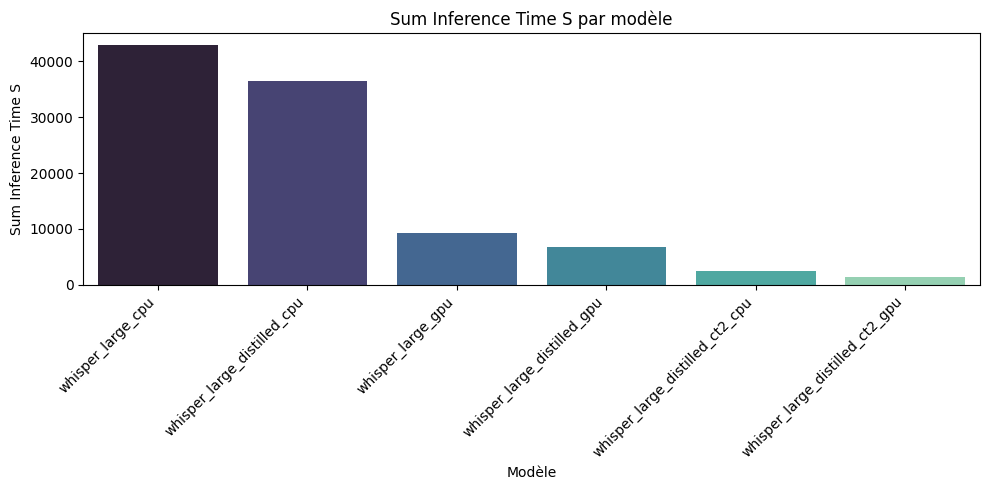

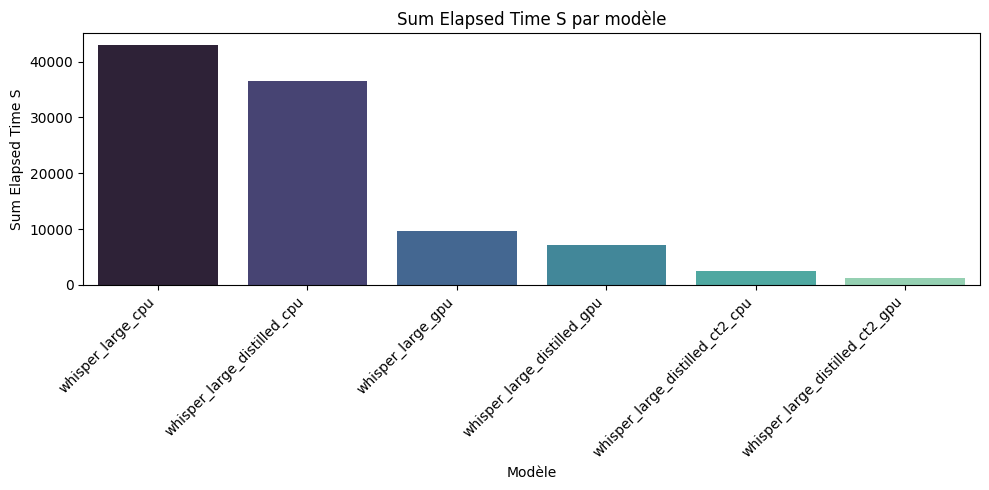

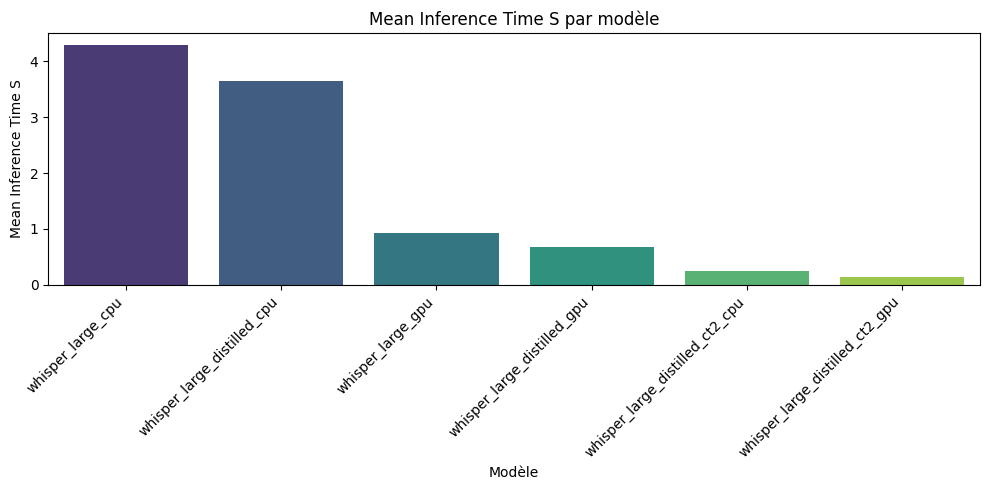

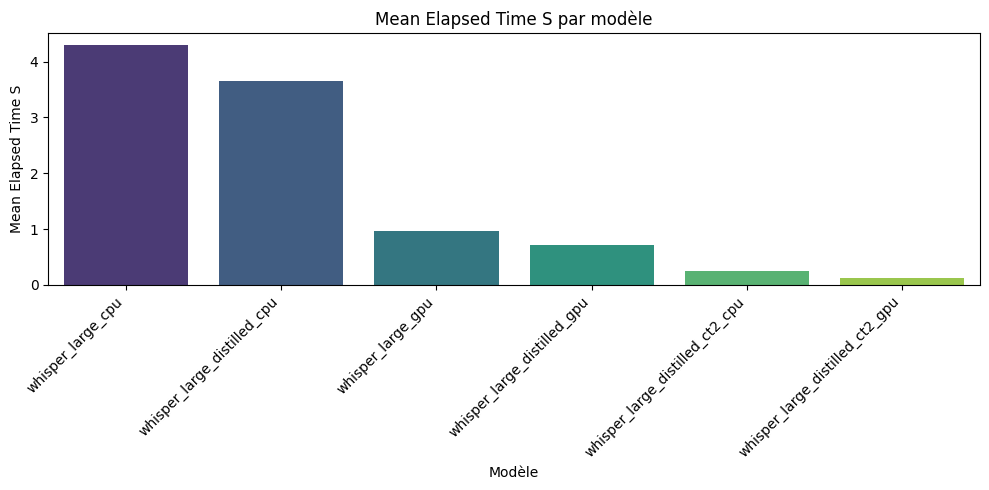

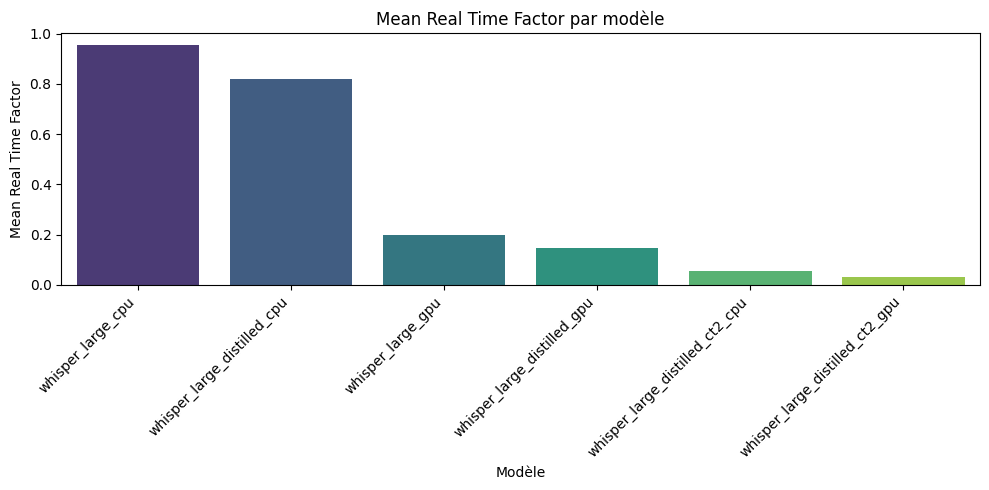

In [6]:
plot_benchmark_summary(summary_df_commonvoice)

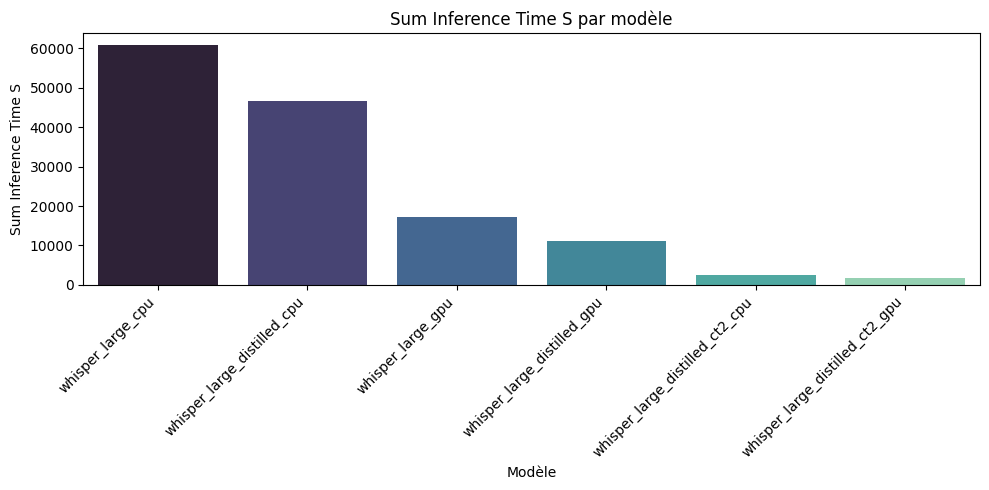

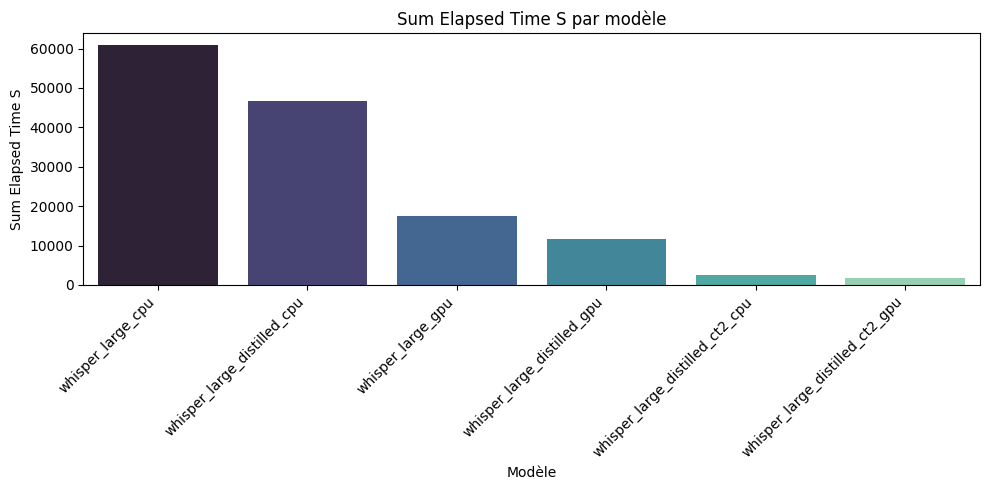

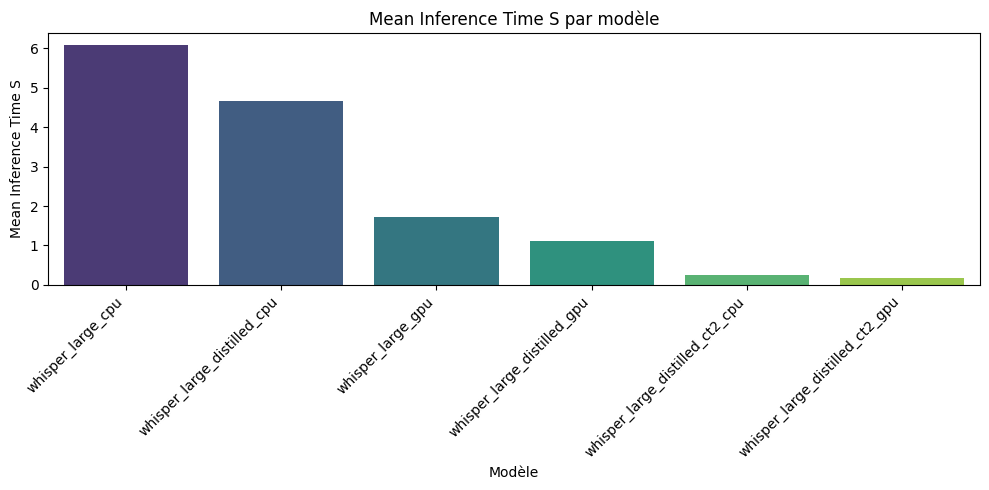

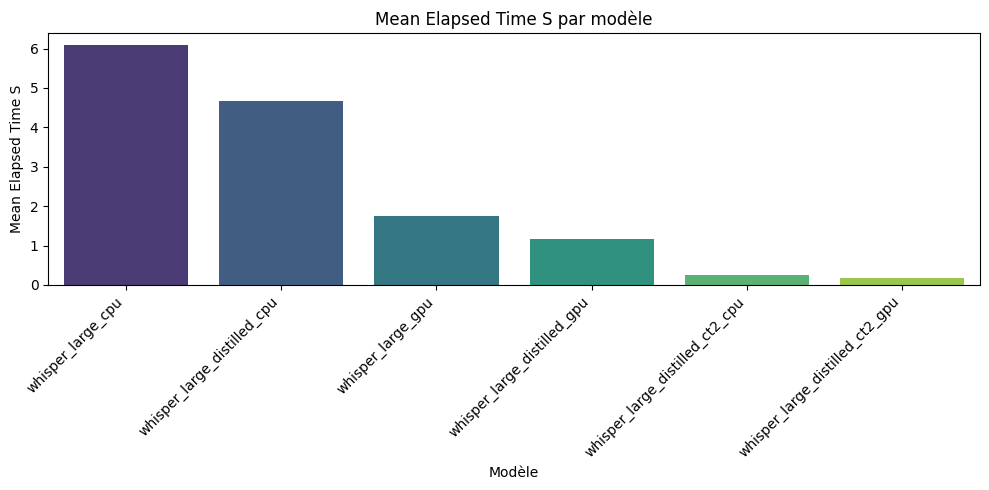

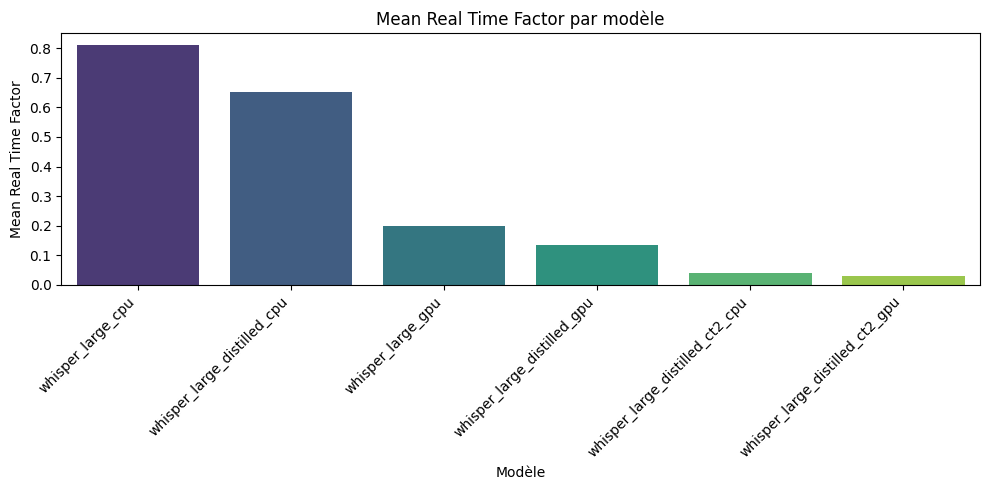

In [7]:
plot_benchmark_summary(summary_df_voxpopuli)

# Observations
- ## On peut remarquer que l'utilisation de GPU amène à de biens meilleures performances en terme de rapidité.
- ## Le gain en rapidité lorsque l'on utilise le modèle CT2 est cependant moins significatif ( ~ 2 x plus rapide).
- ## L'utilisation de faster-whisper permet d'arriver à des performances en rapidité supérieures à celles observées avec le GPU sur les modèles sans le moteur d'inférence CT2.
- ## Les meilleures résultats sont obtenus avec le modèle distilled + CT2 avec un GPU.
- ## Avec la configuration distilled + CT2 + GPU 49352 secondes d'audio sont transcrites en 1323 secondes . **Pour transcrire un heure , il faudrait alors à peu près 1 minute 30 secondes**. 

# Analyse de la distribution du texte à transcrire

Nombre de mots différents : 24691
Nombre de caractères différents : 106
Top 10 mots les plus fréquents : [('de', 4750), ('la', 2949), ('le', 2452), ('est', 2027), ('à', 1907), ('il', 1883), ('et', 1721), ('les', 1580), ('des', 1288), ('en', 1146)]
Top 10 caractères les plus fréquents : [('e', 70135), ('s', 38259), ('a', 36912), ('i', 34890), ('t', 34790), ('n', 34450), ('r', 32311), ('l', 29456), ('u', 26425), ('o', 25310)]


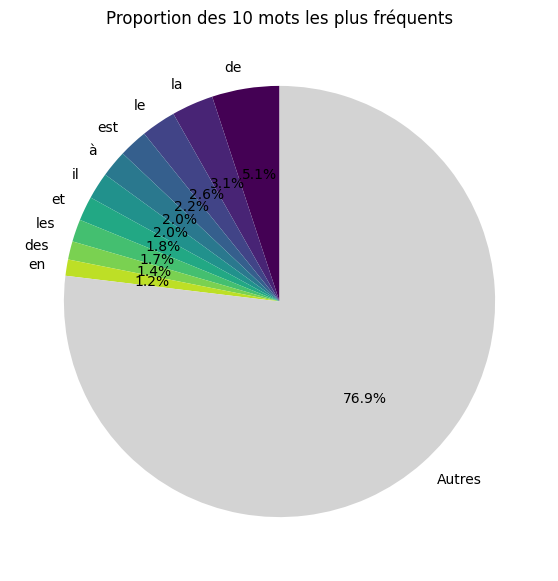

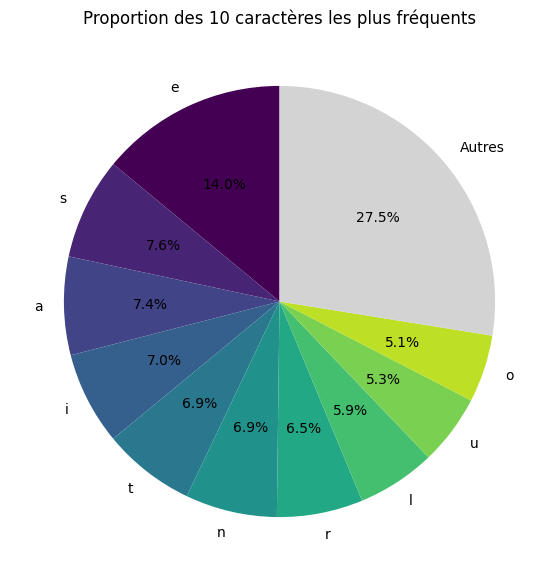

In [8]:
analyze_text_from_dataframe(df_commonvoice, text_col="raw_text")

Nombre de mots différents : 25067
Nombre de caractères différents : 80
Top 10 mots les plus fréquents : [('de', 13751), ('la', 9020), ('et', 6472), ('le', 6287), ('les', 5979), ('des', 5395), ('à', 4980), ('que', 3965), ('en', 3662), ('nous', 3256)]
Top 10 caractères les plus fréquents : [('e', 197755), ('s', 114976), ('n', 105614), ('i', 97446), ('t', 95561), ('r', 91334), ('a', 90825), ('o', 84282), ('u', 79790), ('l', 69065)]


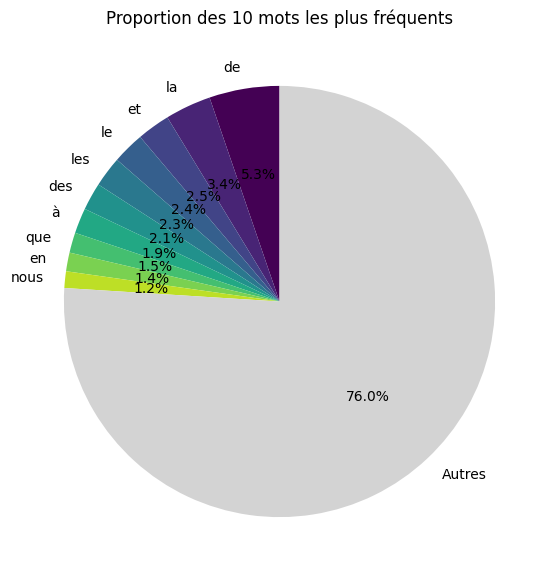

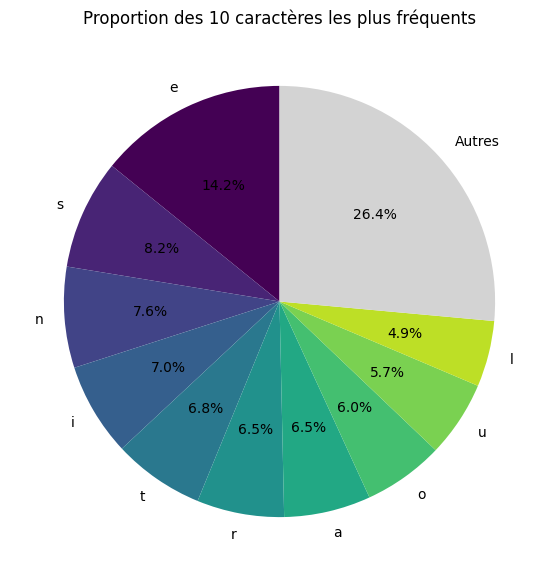

In [9]:
analyze_text_from_dataframe(df_voxpopuli, text_col="raw_text")


=== Analyse erreurs pour whisper_large_cpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 195), ('trois', 145), ('c’est', 129), ('quatre', 126), ('et', 117), ('à', 114), ('cent', 104), ('la', 103), ('le', 97)]


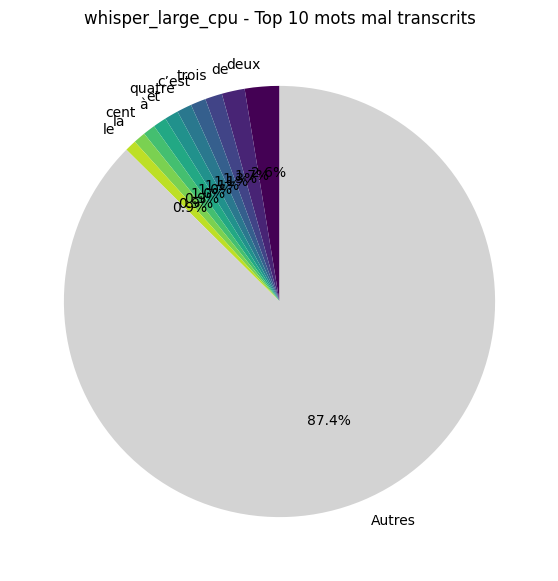

Top 10 caractères mal transcrits : [('e', 13048), ('a', 7301), ('s', 7059), ('i', 7055), ('t', 6841), ('n', 6688), ('r', 6679), ('u', 5641), ('o', 5069), ('l', 4592)]


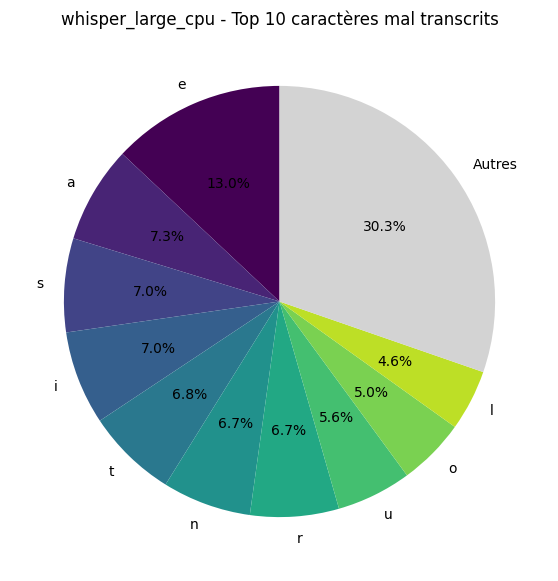


=== Analyse erreurs pour whisper_large_distilled_cpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 179), ('trois', 145), ('c’est', 129), ('quatre', 126), ('cent', 104), ('et', 102), ('à', 98), ('la', 94), ('zéro', 89)]


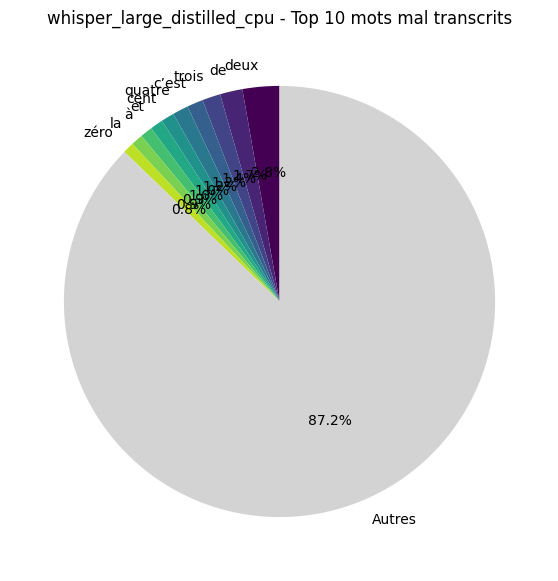

Top 10 caractères mal transcrits : [('e', 12175), ('a', 6704), ('i', 6603), ('s', 6514), ('t', 6334), ('r', 6262), ('n', 6230), ('u', 5220), ('o', 4689), ('l', 4198)]


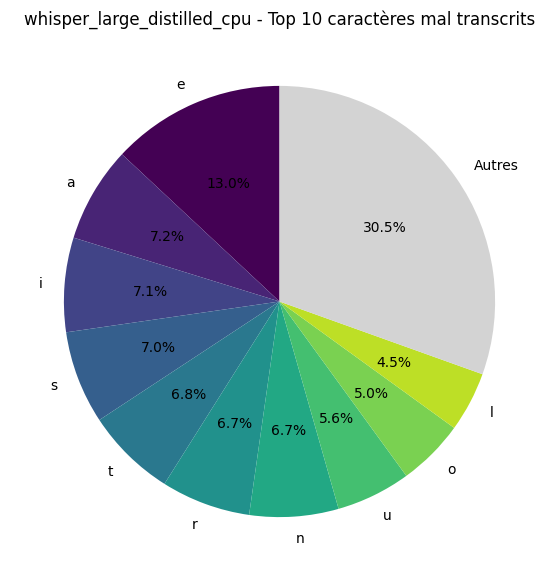


=== Analyse erreurs pour whisper_large_distilled_ct2_cpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 149), ('trois', 145), ('c’est', 129), ('quatre', 126), ('cent', 104), ('et', 96), ('zéro', 89), ('à', 87), ('cinq', 84)]


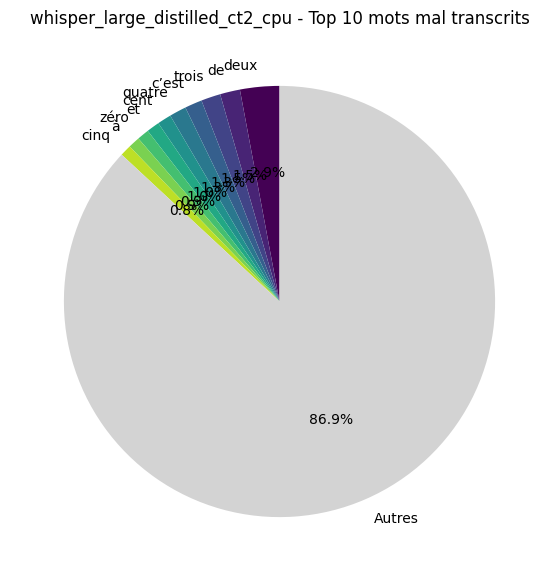

Top 10 caractères mal transcrits : [('e', 12007), ('a', 6612), ('i', 6508), ('s', 6441), ('t', 6239), ('r', 6185), ('n', 6137), ('u', 5133), ('o', 4609), ('l', 4144)]


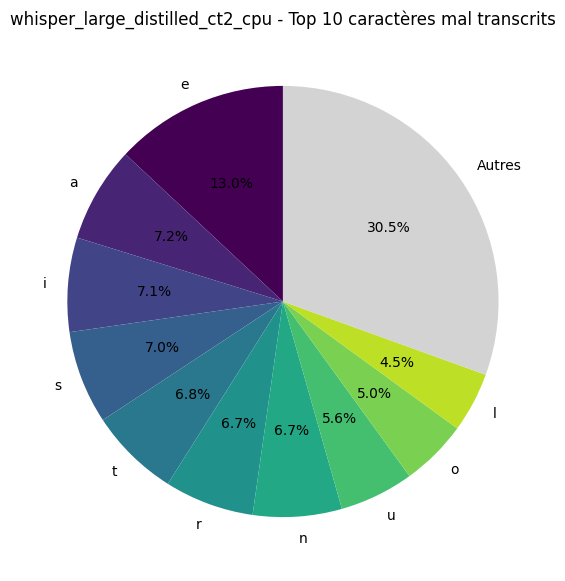


=== Analyse erreurs pour whisper_large_gpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 161), ('trois', 145), ('c’est', 129), ('quatre', 126), ('et', 111), ('cent', 103), ('à', 95), ('zéro', 89), ('cinq', 84)]


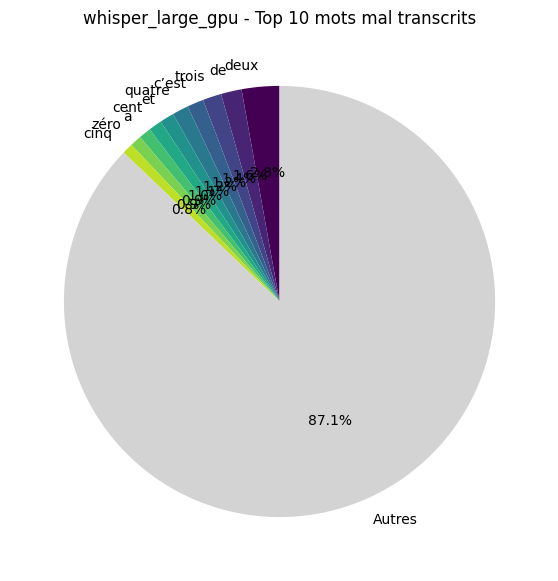

Top 10 caractères mal transcrits : [('e', 12152), ('a', 6720), ('i', 6630), ('s', 6549), ('t', 6369), ('r', 6281), ('n', 6196), ('u', 5198), ('o', 4721), ('l', 4203)]


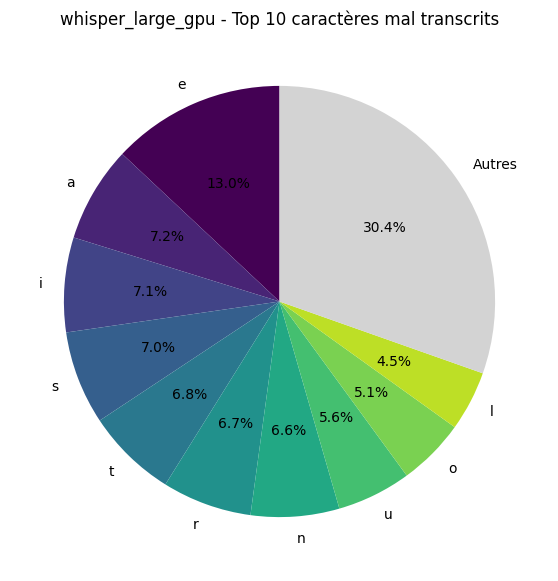


=== Analyse erreurs pour whisper_large_distilled_gpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 165), ('trois', 145), ('c’est', 129), ('quatre', 126), ('et', 104), ('cent', 103), ('à', 90), ('zéro', 89), ('la', 85)]


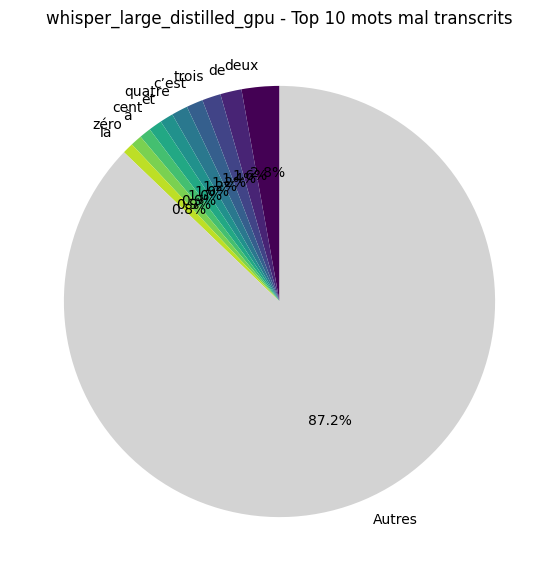

Top 10 caractères mal transcrits : [('e', 11994), ('a', 6626), ('i', 6550), ('s', 6426), ('t', 6226), ('r', 6194), ('n', 6101), ('u', 5151), ('o', 4623), ('l', 4173)]


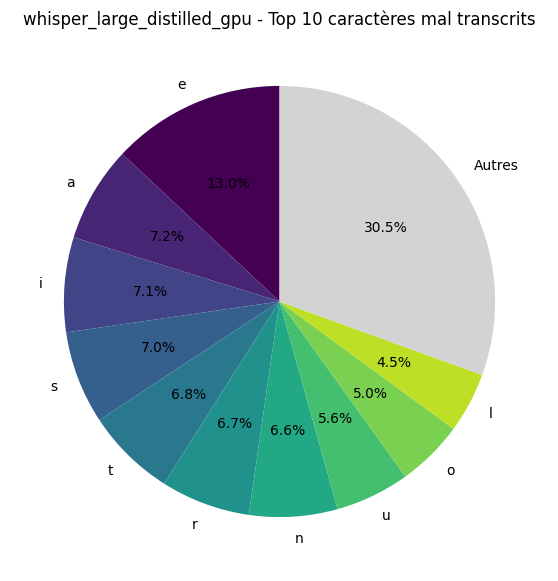


=== Analyse erreurs pour whisper_large_distilled_ct2_gpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 148), ('trois', 145), ('c’est', 129), ('quatre', 126), ('cent', 103), ('et', 97), ('zéro', 89), ('à', 87), ('cinq', 84)]


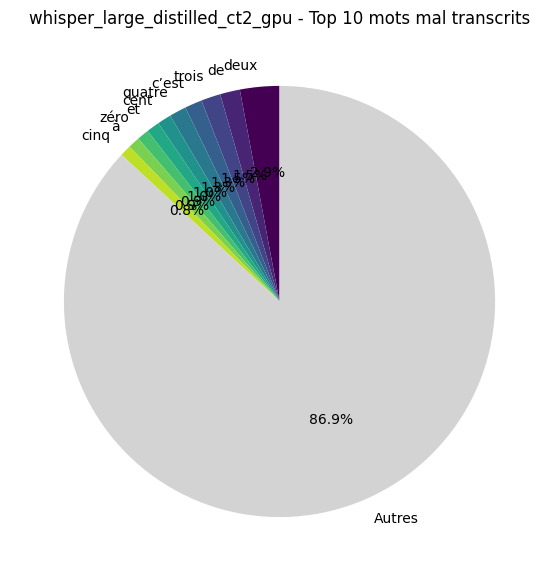

Top 10 caractères mal transcrits : [('e', 11938), ('a', 6601), ('i', 6496), ('s', 6411), ('t', 6215), ('r', 6164), ('n', 6101), ('u', 5121), ('o', 4602), ('l', 4137)]


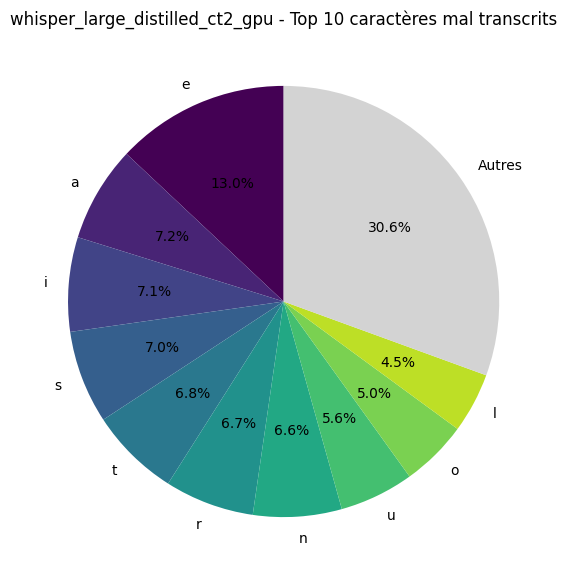

In [10]:
analyze_transcription_errors(df_commonvoice)


=== Analyse erreurs pour whisper_large_cpu ===
Top 10 mots mal transcrits : [('de', 3624), ('la', 2208), ('et', 2038), ('le', 1568), ('les', 1524), ('des', 1488), ('à', 1340), ('que', 1100), ('en', 930), ('qui', 877)]


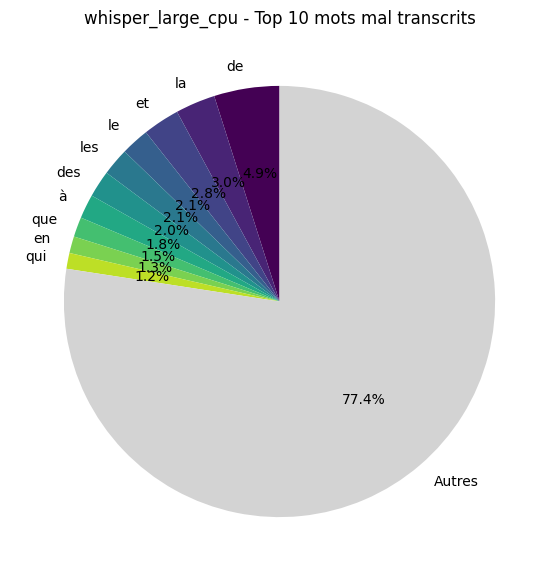

Top 10 caractères mal transcrits : [('e', 85411), ('s', 50710), ('n', 47809), ('i', 44684), ('t', 43912), ('r', 42437), ('a', 42122), ('o', 38554), ('u', 37530), ('l', 31496)]


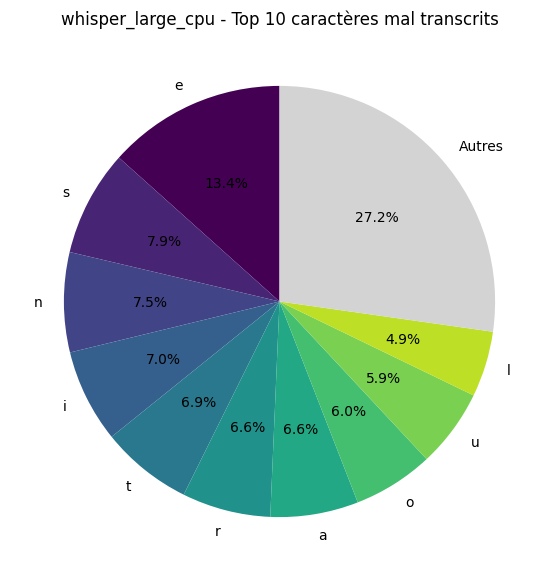


=== Analyse erreurs pour whisper_large_distilled_cpu ===
Top 10 mots mal transcrits : [('de', 3316), ('la', 2078), ('et', 1912), ('le', 1472), ('les', 1400), ('des', 1385), ('à', 1246), ('que', 1030), ('en', 894), ('qui', 822)]


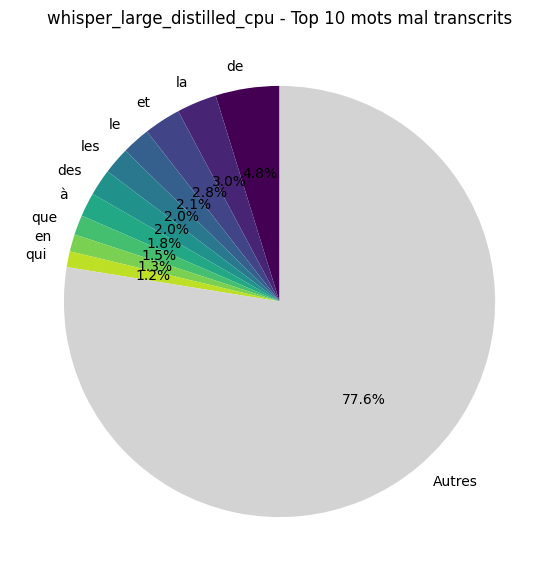

Top 10 caractères mal transcrits : [('e', 81535), ('s', 48219), ('n', 45699), ('i', 42879), ('t', 41983), ('r', 40525), ('a', 40425), ('o', 36862), ('u', 35877), ('l', 30255)]


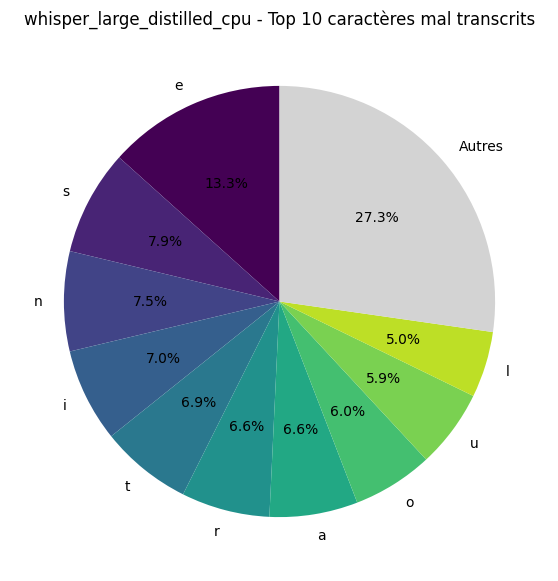


=== Analyse erreurs pour whisper_large_distilled_ct2_cpu ===
Top 10 mots mal transcrits : [('de', 3329), ('la', 2067), ('et', 1911), ('le', 1474), ('les', 1409), ('des', 1386), ('à', 1242), ('que', 1032), ('en', 892), ('qui', 823)]


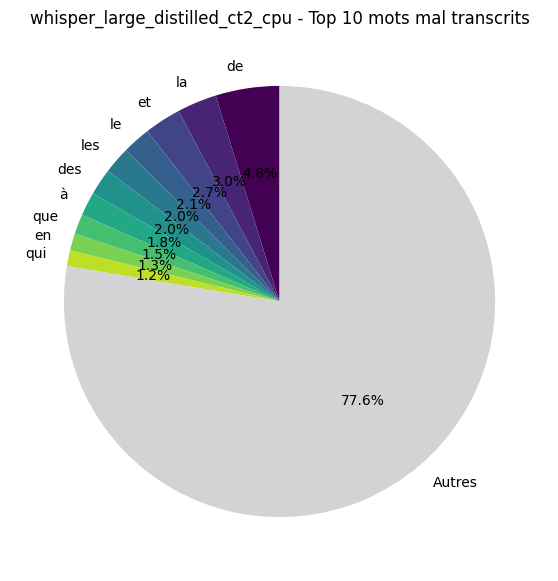

Top 10 caractères mal transcrits : [('e', 81578), ('s', 48200), ('n', 45670), ('i', 42884), ('t', 41951), ('r', 40500), ('a', 40442), ('o', 36822), ('u', 35786), ('l', 30282)]


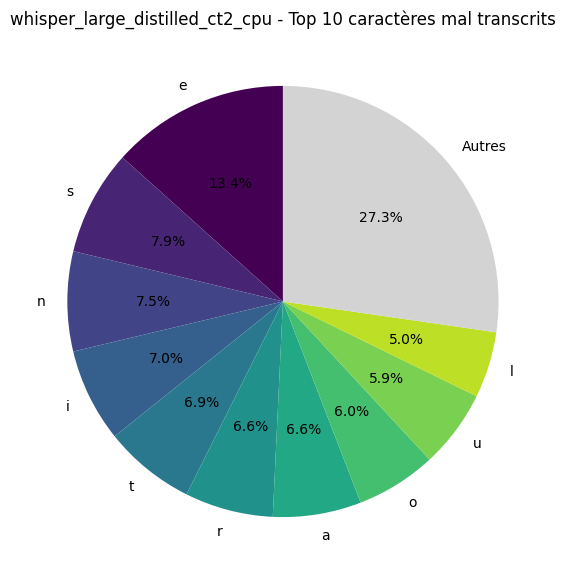


=== Analyse erreurs pour whisper_large_gpu ===
Top 10 mots mal transcrits : [('de', 3195), ('la', 1971), ('et', 1845), ('le', 1399), ('les', 1362), ('des', 1351), ('à', 1189), ('que', 982), ('en', 872), ('qui', 795)]


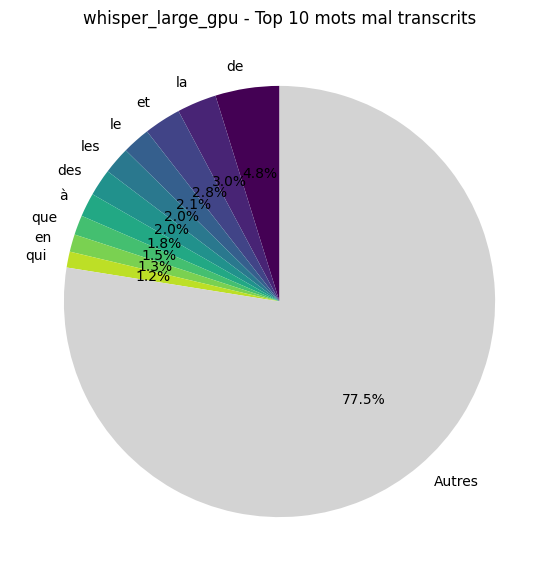

Top 10 caractères mal transcrits : [('e', 79654), ('s', 47060), ('n', 44650), ('i', 41982), ('t', 40983), ('r', 39573), ('a', 39495), ('o', 36042), ('u', 34967), ('l', 29443)]


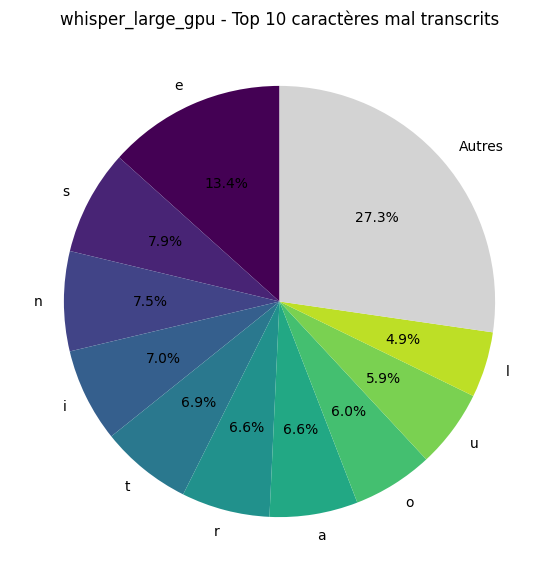


=== Analyse erreurs pour whisper_large_distilled_gpu ===
Top 10 mots mal transcrits : [('de', 3277), ('la', 2031), ('et', 1870), ('le', 1422), ('les', 1369), ('des', 1365), ('à', 1235), ('que', 1001), ('en', 876), ('qui', 810)]


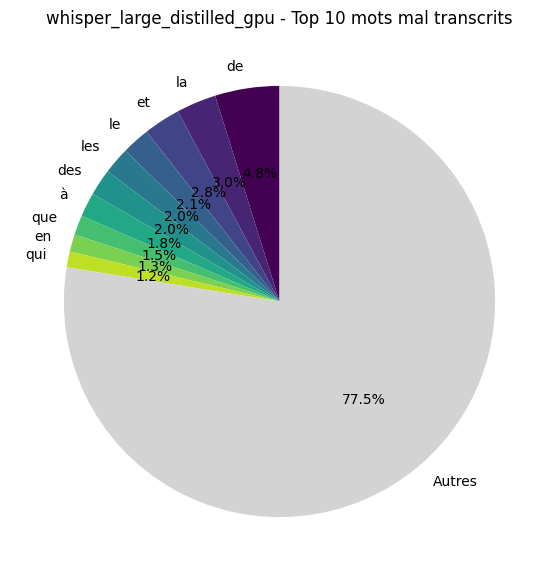

Top 10 caractères mal transcrits : [('e', 80759), ('s', 47712), ('n', 45269), ('i', 42496), ('t', 41580), ('r', 40131), ('a', 40004), ('o', 36498), ('u', 35493), ('l', 29895)]


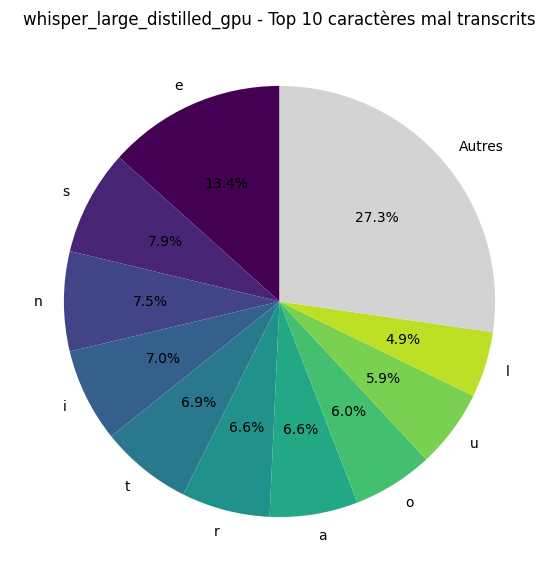


=== Analyse erreurs pour whisper_large_distilled_ct2_gpu ===
Top 10 mots mal transcrits : [('de', 3338), ('la', 2072), ('et', 1902), ('le', 1480), ('les', 1401), ('des', 1373), ('à', 1243), ('que', 1024), ('en', 890), ('qui', 816)]


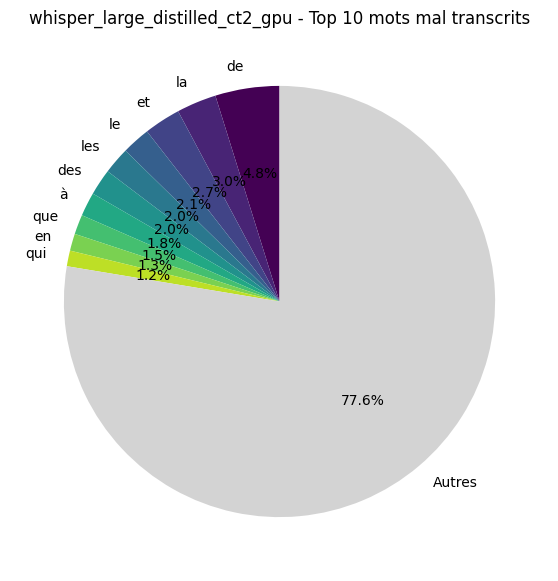

Top 10 caractères mal transcrits : [('e', 81432), ('s', 48093), ('n', 45563), ('i', 42811), ('t', 41897), ('r', 40481), ('a', 40375), ('o', 36736), ('u', 35734), ('l', 30206)]


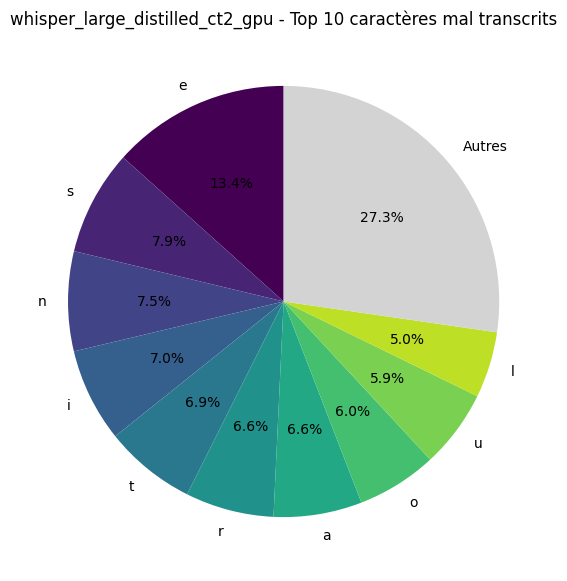

In [11]:
analyze_transcription_errors(df_voxpopuli)

# Calcul des métriques de précision

In [12]:
accuracy_df_commonvoice = compute_transcription_metrics(df_commonvoice)
accuracy_df_voxpopuli = compute_transcription_metrics(df_voxpopuli)

# Définition des métriques d'évaluation de la précision

| Métrique | Définition détaillée                                                                                                                                                                                                                                                                                                                                                           | Calcul dans le code (avec `jiwer`)                                                                 | Interprétation                                                                                                                                            |
| -------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------- |
| WER      | **Word Error Rate (Taux d'erreur sur les mots)** : mesure la proportion de mots mal transcrits par rapport au texte de référence. Elle prend en compte trois types d'erreurs : <br> - **Substitutions** : un mot a été remplacé par un autre<br> - **Insertions** : un mot a été ajouté<br> - **Suppressions** : un mot du texte de référence est absent dans la transcription | `wer(ref, hyp)` où `ref` est le texte de référence et `hyp` la transcription générée par le modèle | Valeur entre 0 et 1. Plus proche de 0 = meilleure transcription. Ex. 0.13 signifie que 13% des mots sont erronés.                                         |
| CER      | **Character Error Rate (Taux d'erreur sur les caractères)** : proportion de caractères incorrects. Utile pour détecter fautes mineures, accents ou contractions.                                                                                                                                                                                                               | `cer(ref, hyp)`                                                                                    | Valeur entre 0 et 1. Plus proche de 0 = meilleure transcription. Ex. 0.06 signifie que 6% des caractères sont erronés.                                    |
| MER      | **Match Error Rate (Taux d'erreurs de correspondance)** : similaire au WER mais plus indulgent ; il évalue combien de mots du texte de référence sont mal alignés avec la transcription, sans pénaliser certaines différences mineures comme la position exacte des mots.                                                                                                      | `process_words(ref, hyp).mer`                                                                      | Valeur entre 0 et 1. Plus proche de 0 = meilleure correspondance globale des mots. Ex. 0.127 signifie que 12.7% des mots sont mal appariés.               |
| WIL      | **Word Information Lost (Information perdue sur les mots)** : fraction d'information du texte de référence qui n'est pas correctement transcrite.                                                                                                                                                                                                                              | `process_words(ref, hyp).wil`                                                                      | Valeur entre 0 et 1. Plus proche de 0 = peu d'information perdue. Ex. 0.187 signifie que 18.7% de l'information des mots est perdue.                      |
| WIP      | **Word Information Preserved (Information conservée sur les mots)** : fraction d'information du texte de référence correctement transcrite. Complémentaire de WIL : WIP = 1 - WIL.                                                                                                                                                                                             | `process_words(ref, hyp).wip`                                                                      | Valeur entre 0 et 1. Plus proche de 1 = plus d'information conservée. Ex. 0.813 signifie que 81.3% de l'information des mots est correctement transcrite. |


# Common Voice FR 21

In [13]:
accuracy_df_commonvoice

,model,WER,CER,MER,WIL,WIP,Substitutions,Insertions,Deletions,Hits,Total_Ref_Words
5,whisper_large_distilled_ct2_gpu,0.131082,0.061630,0.127160,0.187031,0.812969,7695,451,1108,85174,93977
2,whisper_large_distilled_ct2_cpu,0.131512,0.061970,0.127266,0.187208,0.812792,7705,451,1109,85163,93977
4,whisper_large_distilled_gpu,0.134273,0.061362,0.132763,0.193833,0.806167,7895,268,1418,84664,93977
3,whisper_large_gpu,0.134541,0.061431,0.133153,0.194621,0.805379,7901,254,1444,84632,93977
1,whisper_large_distilled_cpu,0.136603,0.062748,0.135065,0.196988,0.803012,8038,286,1459,84480,93977
0,whisper_large_cpu,0.142077,0.064943,0.140376,0.205987,0.794013,8500,319,1491,83986,93977


# Voxpopuli FR

In [14]:
accuracy_df_voxpopuli

,model,WER,CER,MER,WIL,WIP,Substitutions,Insertions,Deletions,Hits,Total_Ref_Words
4,whisper_large_distilled_cpu,1.259749,2.409384,0.110833,0.153725,0.846275,15433,14217,5444,240621,261498
1,whisper_large_distilled_gpu,1.260405,2.411203,0.109544,0.151957,0.848043,15186,14174,5365,240947,261498
0,whisper_large_gpu,1.260948,2.411429,0.107998,0.149547,0.850453,14634,14384,5280,241584,261498
3,whisper_large_cpu,1.264638,2.413454,0.116299,0.162633,0.837367,16196,14218,6011,239291,261498
2,whisper_large_distilled_ct2_gpu,1.275146,2.426252,0.114243,0.158443,0.841557,15677,14746,4505,241316,261498
5,whisper_large_distilled_ct2_cpu,1.275757,2.427844,0.114311,0.158538,0.841462,15715,14748,4503,241280,261498


# Génération de graphiques de visualisation des mesures de précision

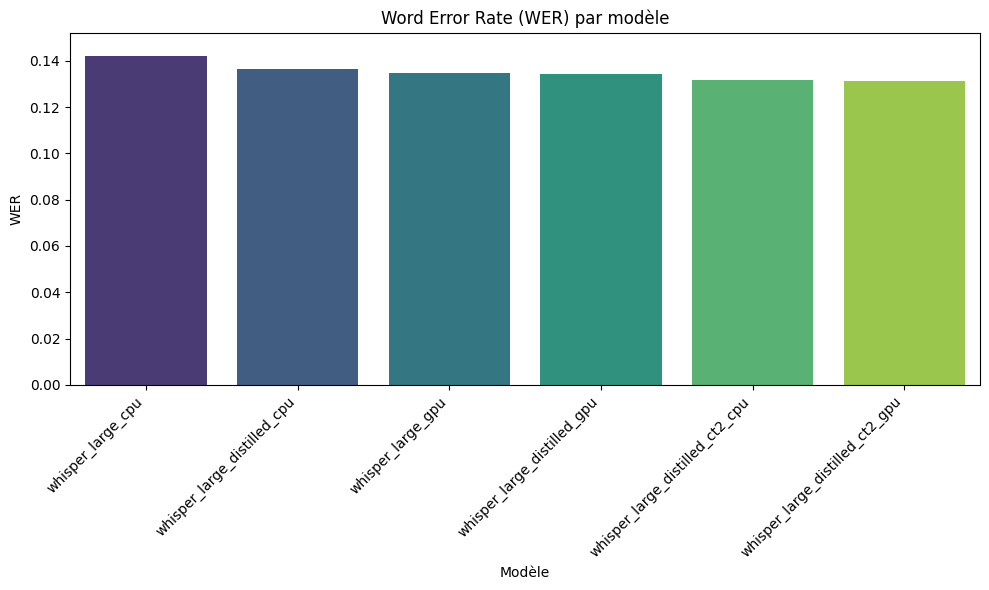

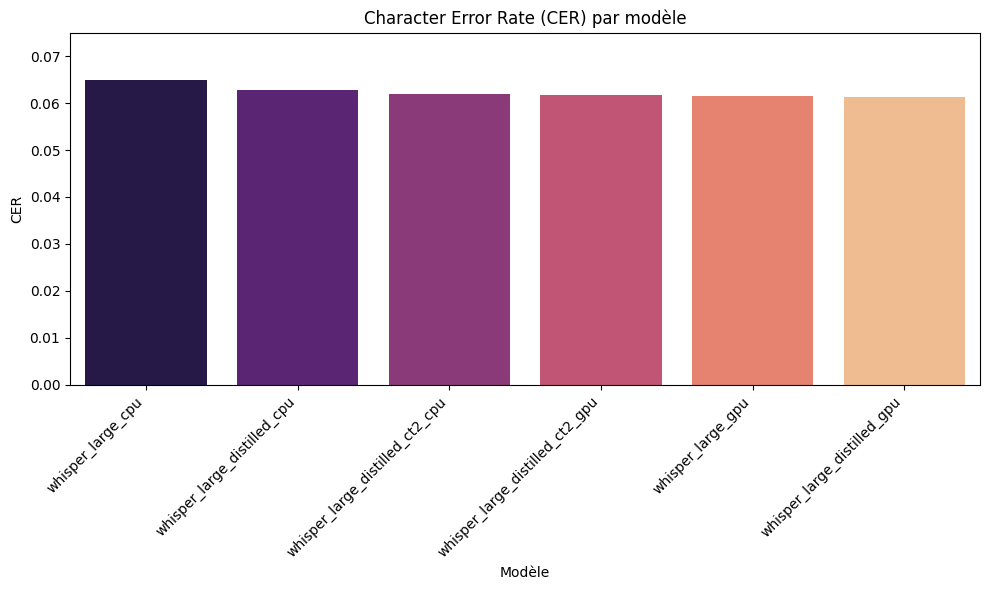

In [15]:
plot_accuracy_metrics(accuracy_df_commonvoice)

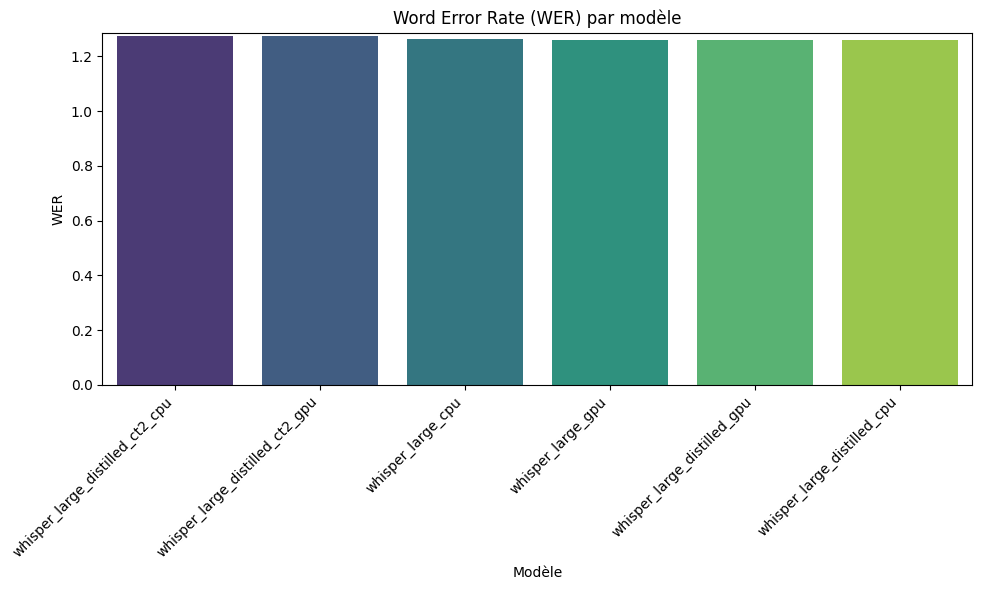

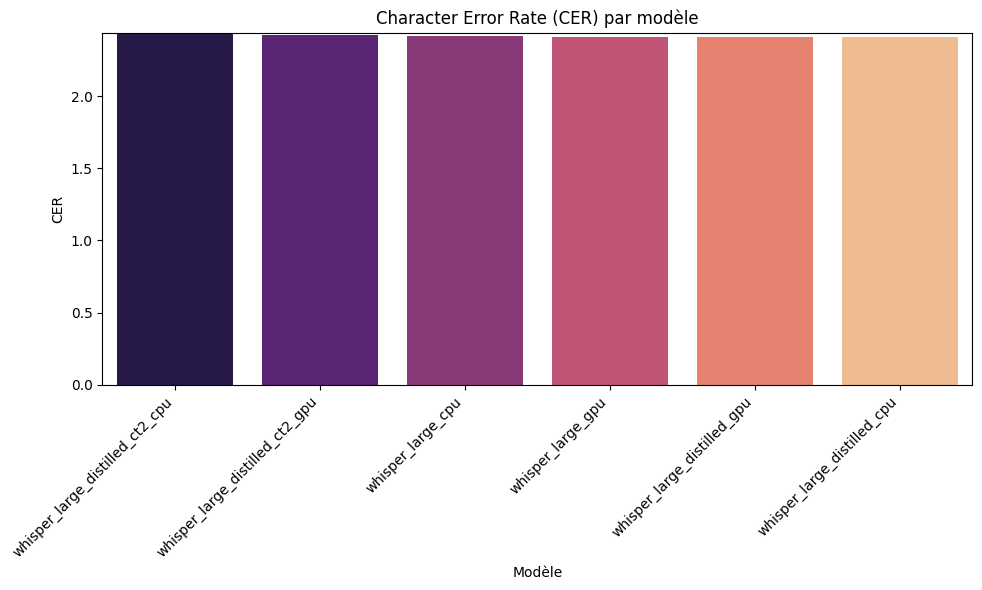

In [16]:
plot_accuracy_metrics(accuracy_df_voxpopuli)

# Observations

- ## La distillation ou la substitution de moteur d'inférence par CT2 ne réduit pas la précision.
- ## Le modèle distilled + CT2 obtient les meilleures perfomances en précisoon WER même si la différence avec les autres modèles est minimale.

# Conclusion
- ## **L'utilisation des méthodes de distillation et de changement de moteur d'inférence permettent d'améliorer significativement la rapidité de transcription**.
- ## **L'utilisation de ces méthodes conserve la précision du modèle**.
- ## **L'utilisation du moteur d'inférence CT2 permet de réduire significativement la différence de rapidité que l'on peut observer si on ne dispose pas de GPU**.
- ## **Les meilleurs résultats rapidité/précision sont obtenus avec le modèle distilled + CT2 en utilisant un GPU**.